In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**Here we are replacing the columns name for better understanding**

In [5]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs_Scored', 
                  'AB' : 'At_Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home_Runs', 
                  'BB' : 'Base_on_Balls', 
                  'SO' : 'Strike_Outs', 
                  'SB' : 'Stolen_Base',
                  'RA' : 'Runs_Average', 
                  'ER' : 'Earned_Runs', 
                 'ERA' : 'Earned_Run_Average', 
                  'CG' : 'Complete_Game',
                 'SHO' : 'Shut_Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [6]:
df.head()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs_Scored         30 non-null     int64  
 2   At_Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home_Runs           30 non-null     int64  
 7   Base_on_Balls       30 non-null     int64  
 8   Strike_Outs         30 non-null     int64  
 9   Stolen_Base         30 non-null     int64  
 10  Runs_Average        30 non-null     int64  
 11  Earned_Runs         30 non-null     int64  
 12  Earned_Run_Average  30 non-null     float64
 13  Complete_Game       30 non-null     int64  
 14  Shut_Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [8]:
df.describe()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

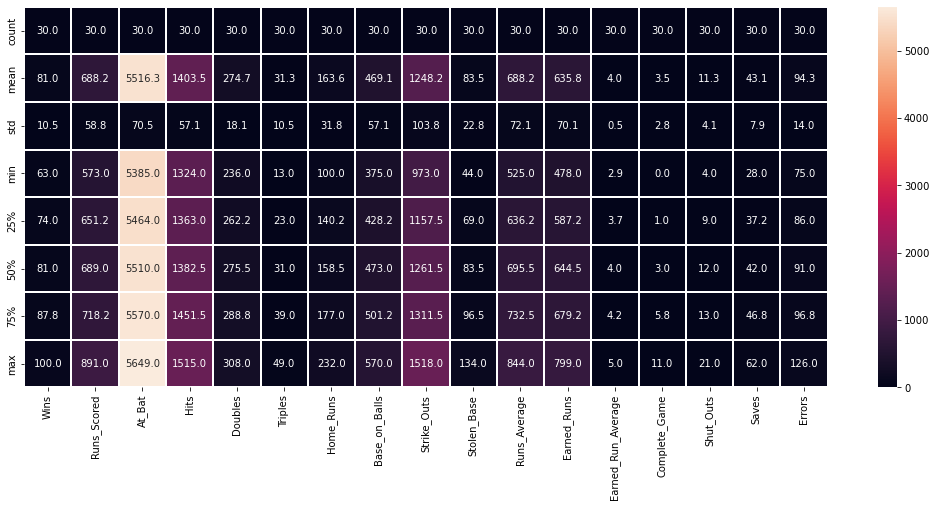

In [9]:
# Visualizing the statistics of the columns using heatmap
plt.figure(figsize=(18,7))
sns.heatmap(df.describe(), linewidth = 0.15, fmt = '0.1f', annot = True)

In [10]:
#to show the describe details columnswise
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs_Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At_Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home_Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base_on_Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike_Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen_Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [11]:
df.isnull().sum()

Wins                  0
Runs_Scored           0
At_Bat                0
Hits                  0
Doubles               0
Triples               0
Home_Runs             0
Base_on_Balls         0
Strike_Outs           0
Stolen_Base           0
Runs_Average          0
Earned_Runs           0
Earned_Run_Average    0
Complete_Game         0
Shut_Outs             0
Saves                 0
Errors                0
dtype: int64

In [12]:
missing_value = df.isnull().sum().sort_values(ascending = False)
missing_value_percentage = (missing_value/len(df))*100
print(pd.concat([missing_value, missing_value_percentage], axis = 1, keys = ['missing_value', 'missing_percentage %']))

                    missing_value  missing_percentage %
Wins                            0                   0.0
Stolen_Base                     0                   0.0
Saves                           0                   0.0
Shut_Outs                       0                   0.0
Complete_Game                   0                   0.0
Earned_Run_Average              0                   0.0
Earned_Runs                     0                   0.0
Runs_Average                    0                   0.0
Strike_Outs                     0                   0.0
Runs_Scored                     0                   0.0
Base_on_Balls                   0                   0.0
Home_Runs                       0                   0.0
Triples                         0                   0.0
Doubles                         0                   0.0
Hits                            0                   0.0
At_Bat                          0                   0.0
Errors                          0               

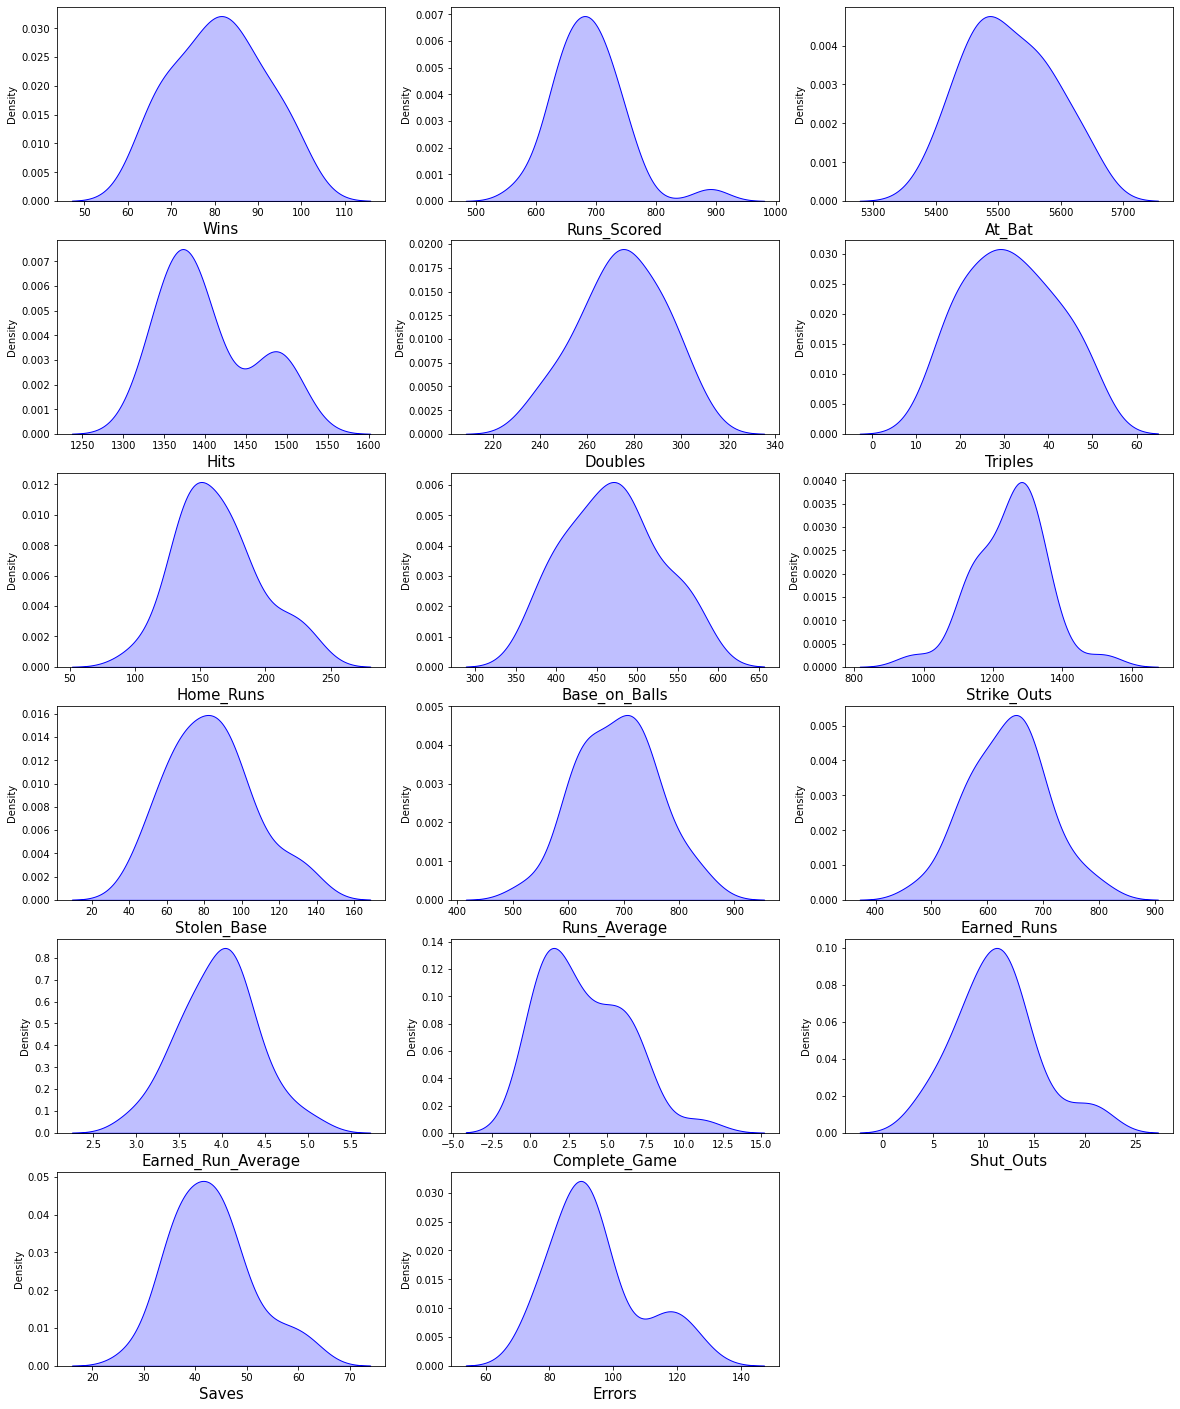

In [13]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color = 'b', hist = False, kde_kws={'shade':True})
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
plt.show()

Text(0, 0.5, 'Hits')

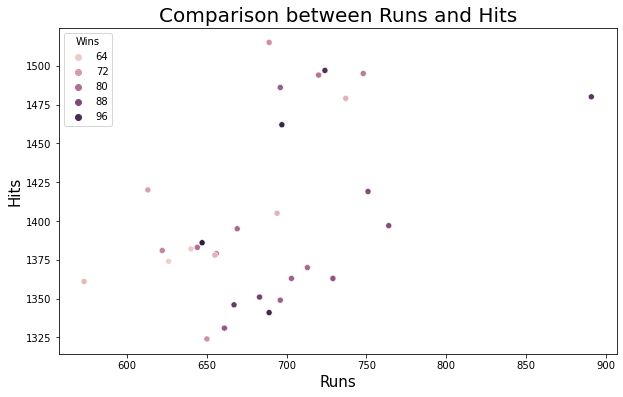

In [14]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(df['Runs_Scored'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs',fontsize =15)
plt.ylabel("Hits",fontsize =15)

Text(0, 0.5, 'Home Runs')

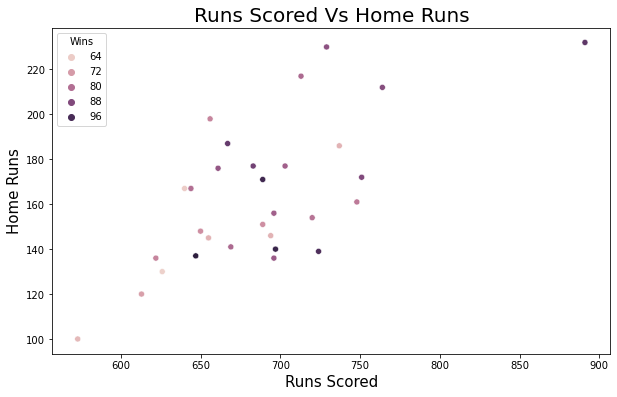

In [15]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(df['Runs_Scored'],df['Home_Runs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =15)
plt.ylabel('Home Runs',fontsize =15)

Text(0, 0.5, 'Strike Outs')

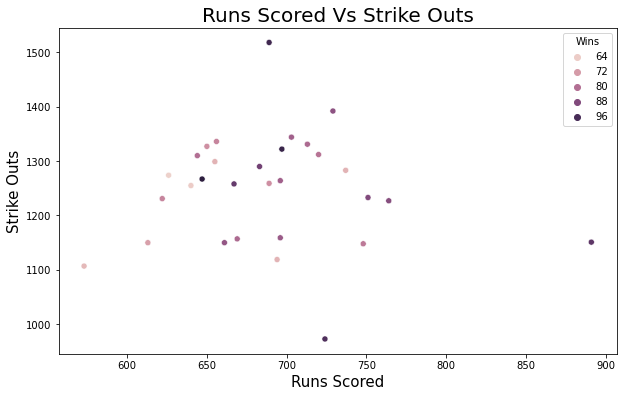

In [16]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs',fontsize =20)
sns.scatterplot(df['Runs_Scored'],df['Strike_Outs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =15)
plt.ylabel('Strike Outs',fontsize =15)

Text(0, 0.5, 'Strike Outs')

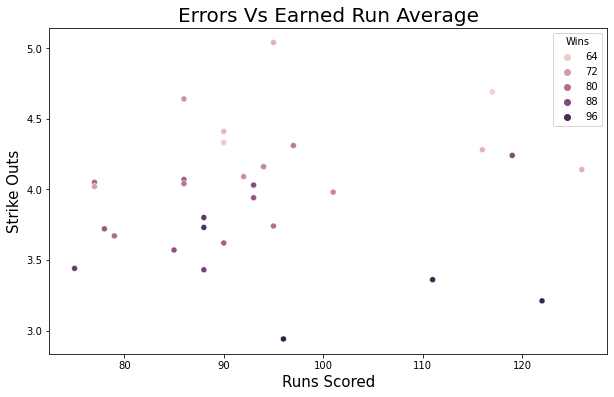

In [17]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(df['Errors'],df['Earned_Run_Average'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =15)
plt.ylabel('Strike Outs',fontsize =15)

Text(0, 0.5, 'Earned Run Average')

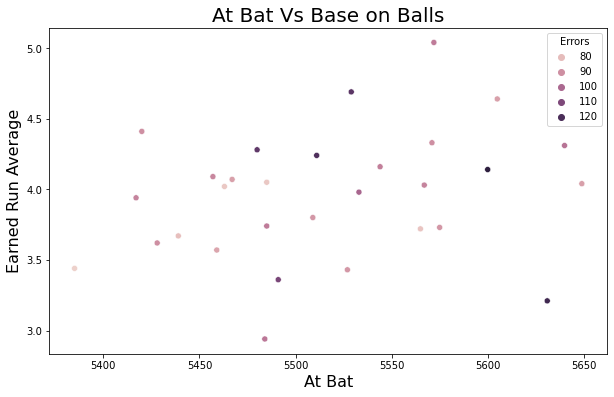

In [18]:
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(df['At_Bat'],df['Earned_Run_Average'],hue=df['Errors'], cmap=('Spectral'))
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

### we are creating boxplot for better understanding

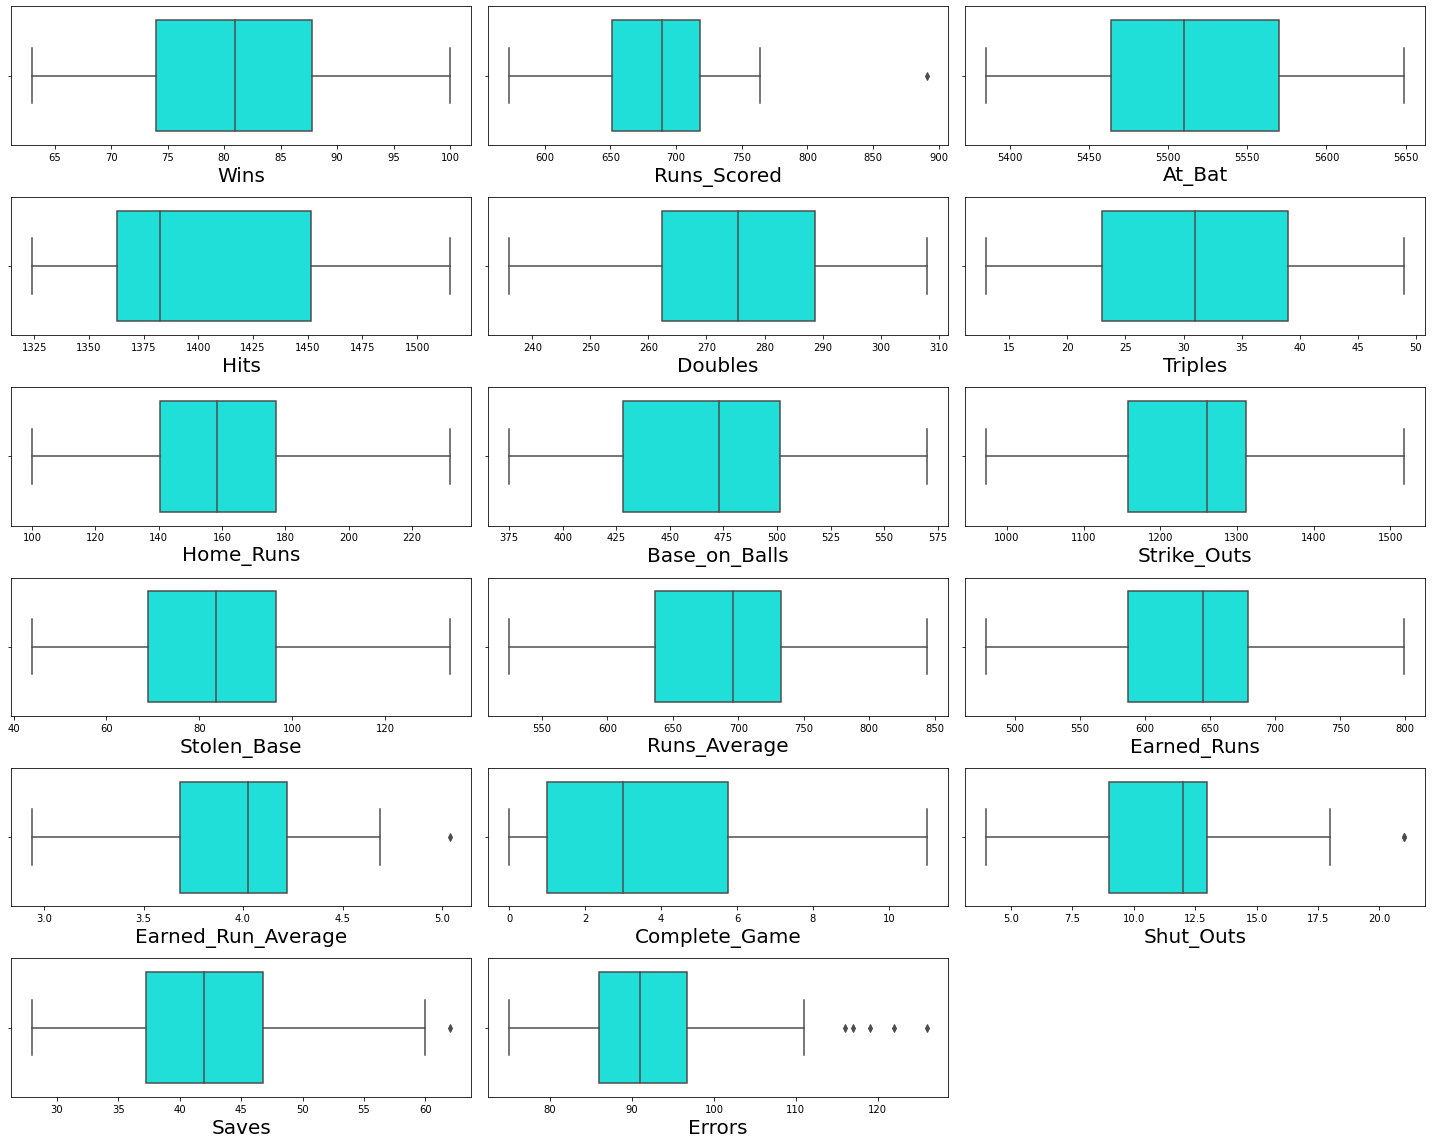

In [19]:
plt.figure(figsize=(20,16), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

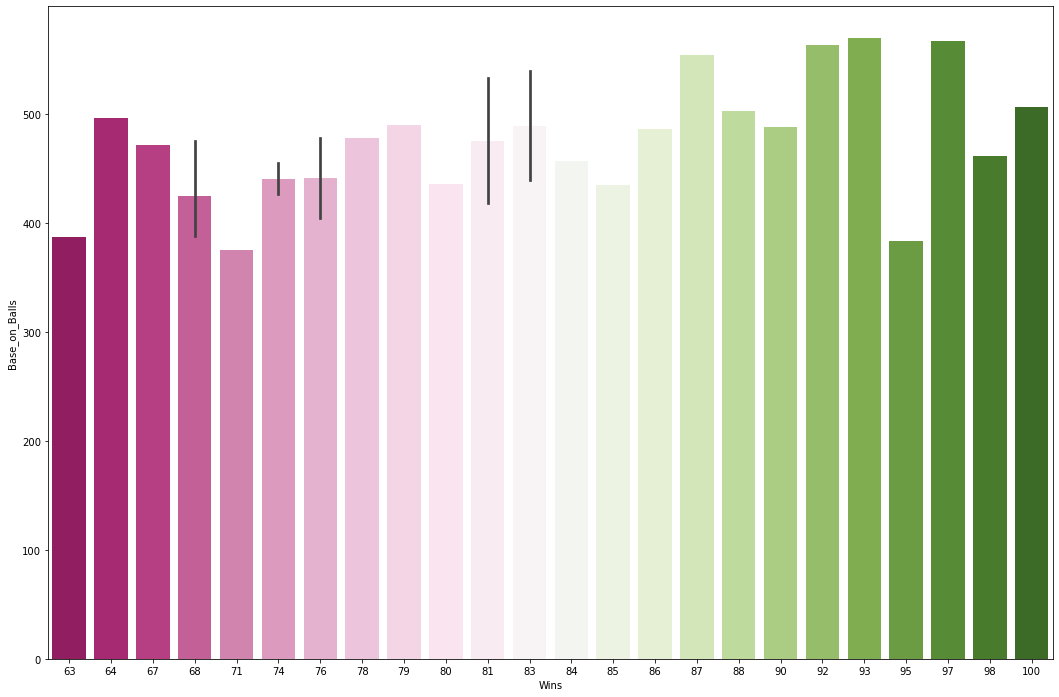

In [20]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base_on_Balls", data=df,palette='PiYG')
plt.show()

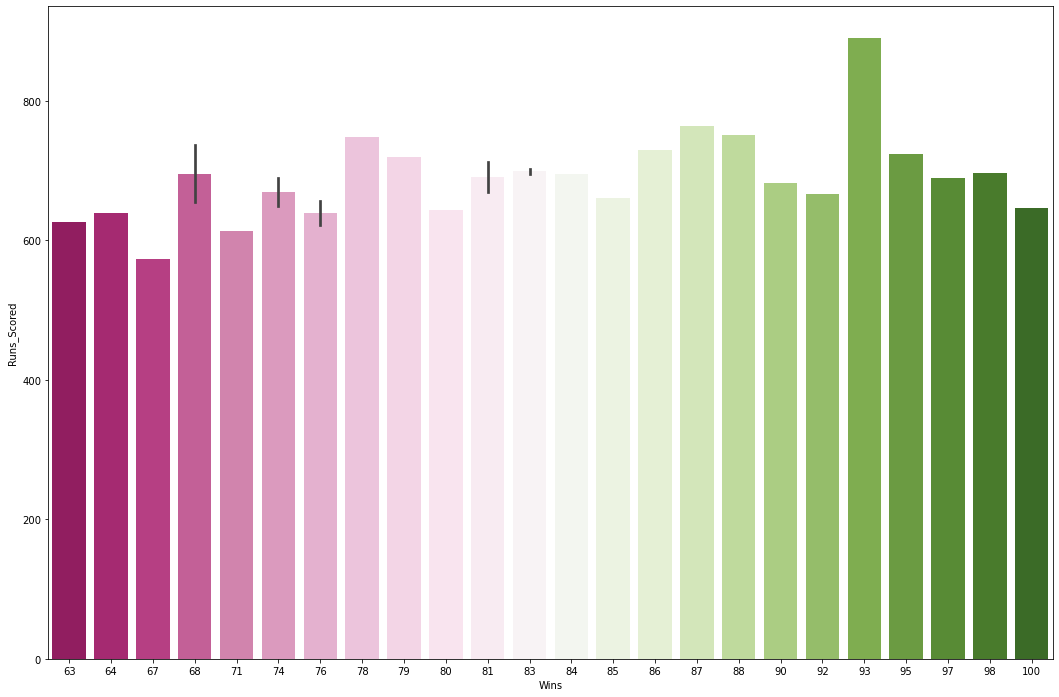

In [21]:
plt.figure(figsize = (18, 12))
sns.barplot(x = 'Wins', y = 'Runs_Scored', data = df, palette = 'PiYG')
plt.show()

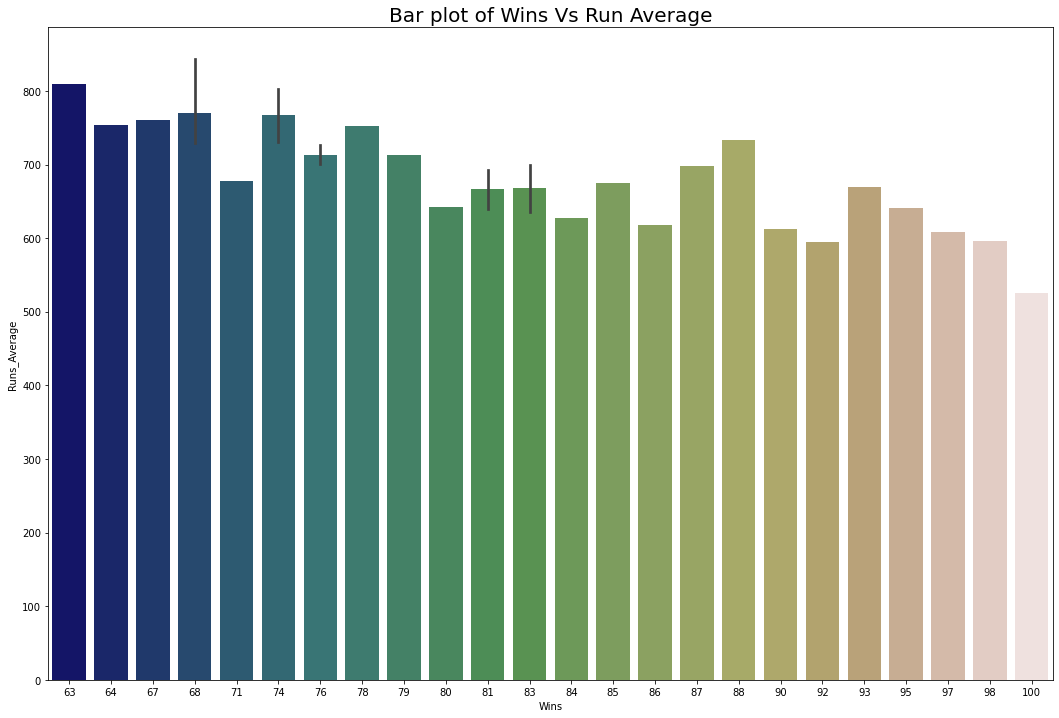

In [22]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs_Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

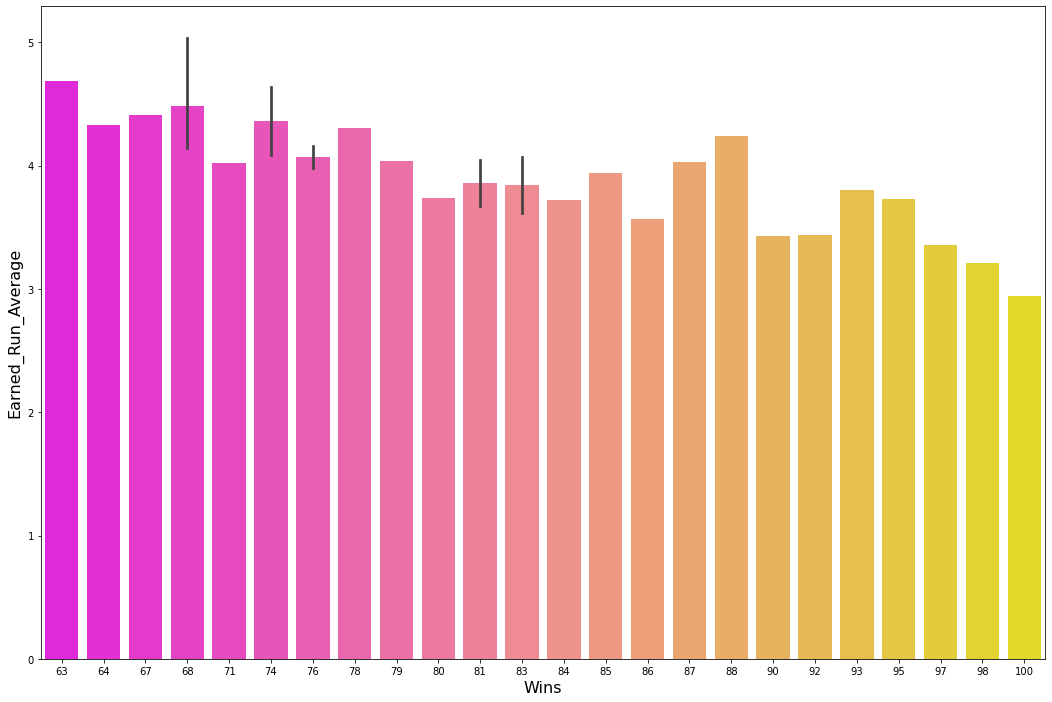

In [23]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned_Run_Average", data=df,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned_Run_Average',fontsize =16)
plt.show()

Text(0, 0.5, 'Earned Run Average')

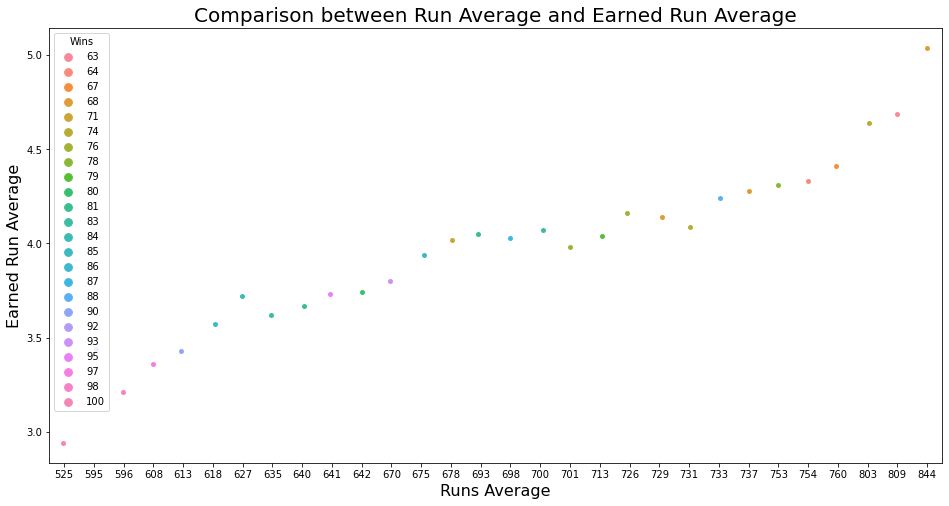

In [24]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs_Average'],df['Earned_Run_Average'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

Text(0, 0.5, 'Strike Outs')

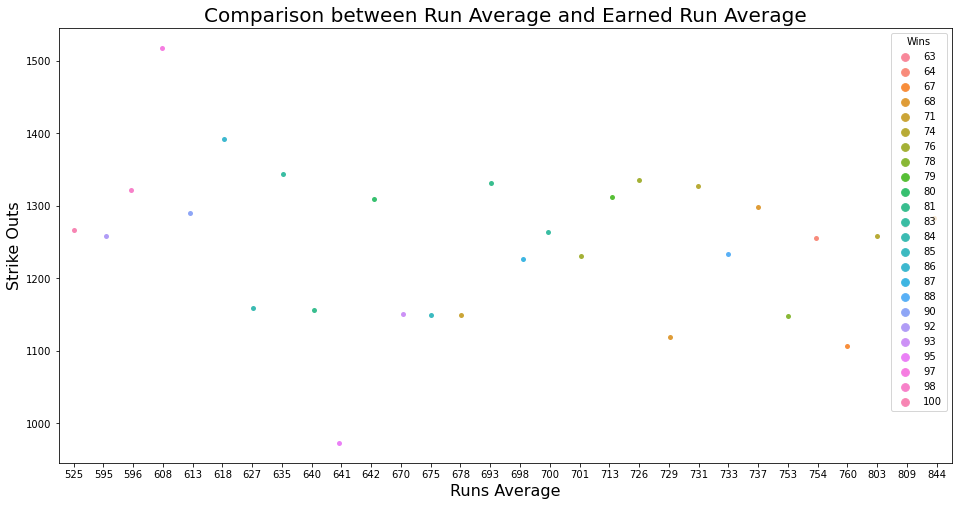

In [25]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs_Average'],df['Strike_Outs'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

In [26]:
df['Runs_Scored'].max()

891

In [27]:
df.loc[df['Runs_Scored']==891]

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


In [28]:
df['Home_Runs'].max(),df['Base_on_Balls'].max(),df['Doubles'].max()

(232, 570, 308)

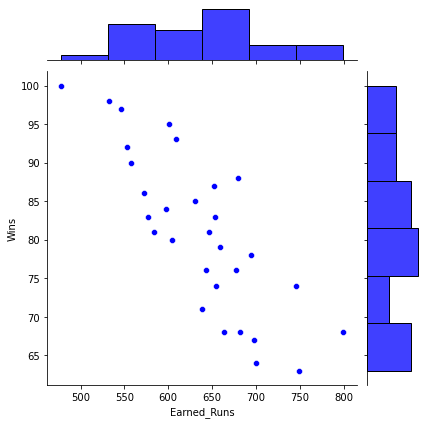

In [29]:
sns.jointplot(x="Earned_Runs", y="Wins", data=df, color="blue",palette="Set1")

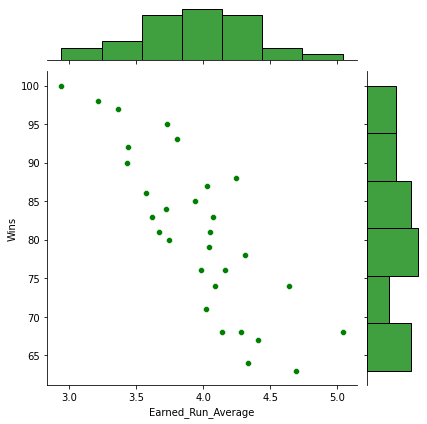

In [30]:
sns.jointplot(x="Earned_Run_Average", y="Wins", data=df, color="green",palette="Set1")

<Figure size 720x720 with 0 Axes>

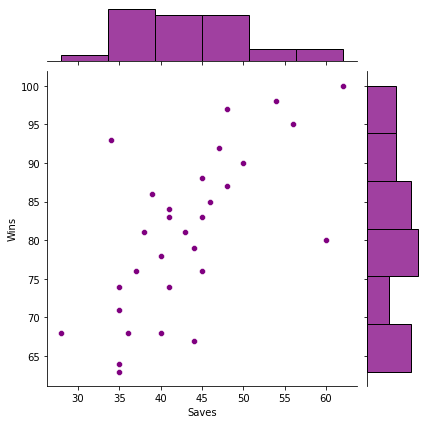

In [31]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Saves", y="Wins", data=df, color="purple")

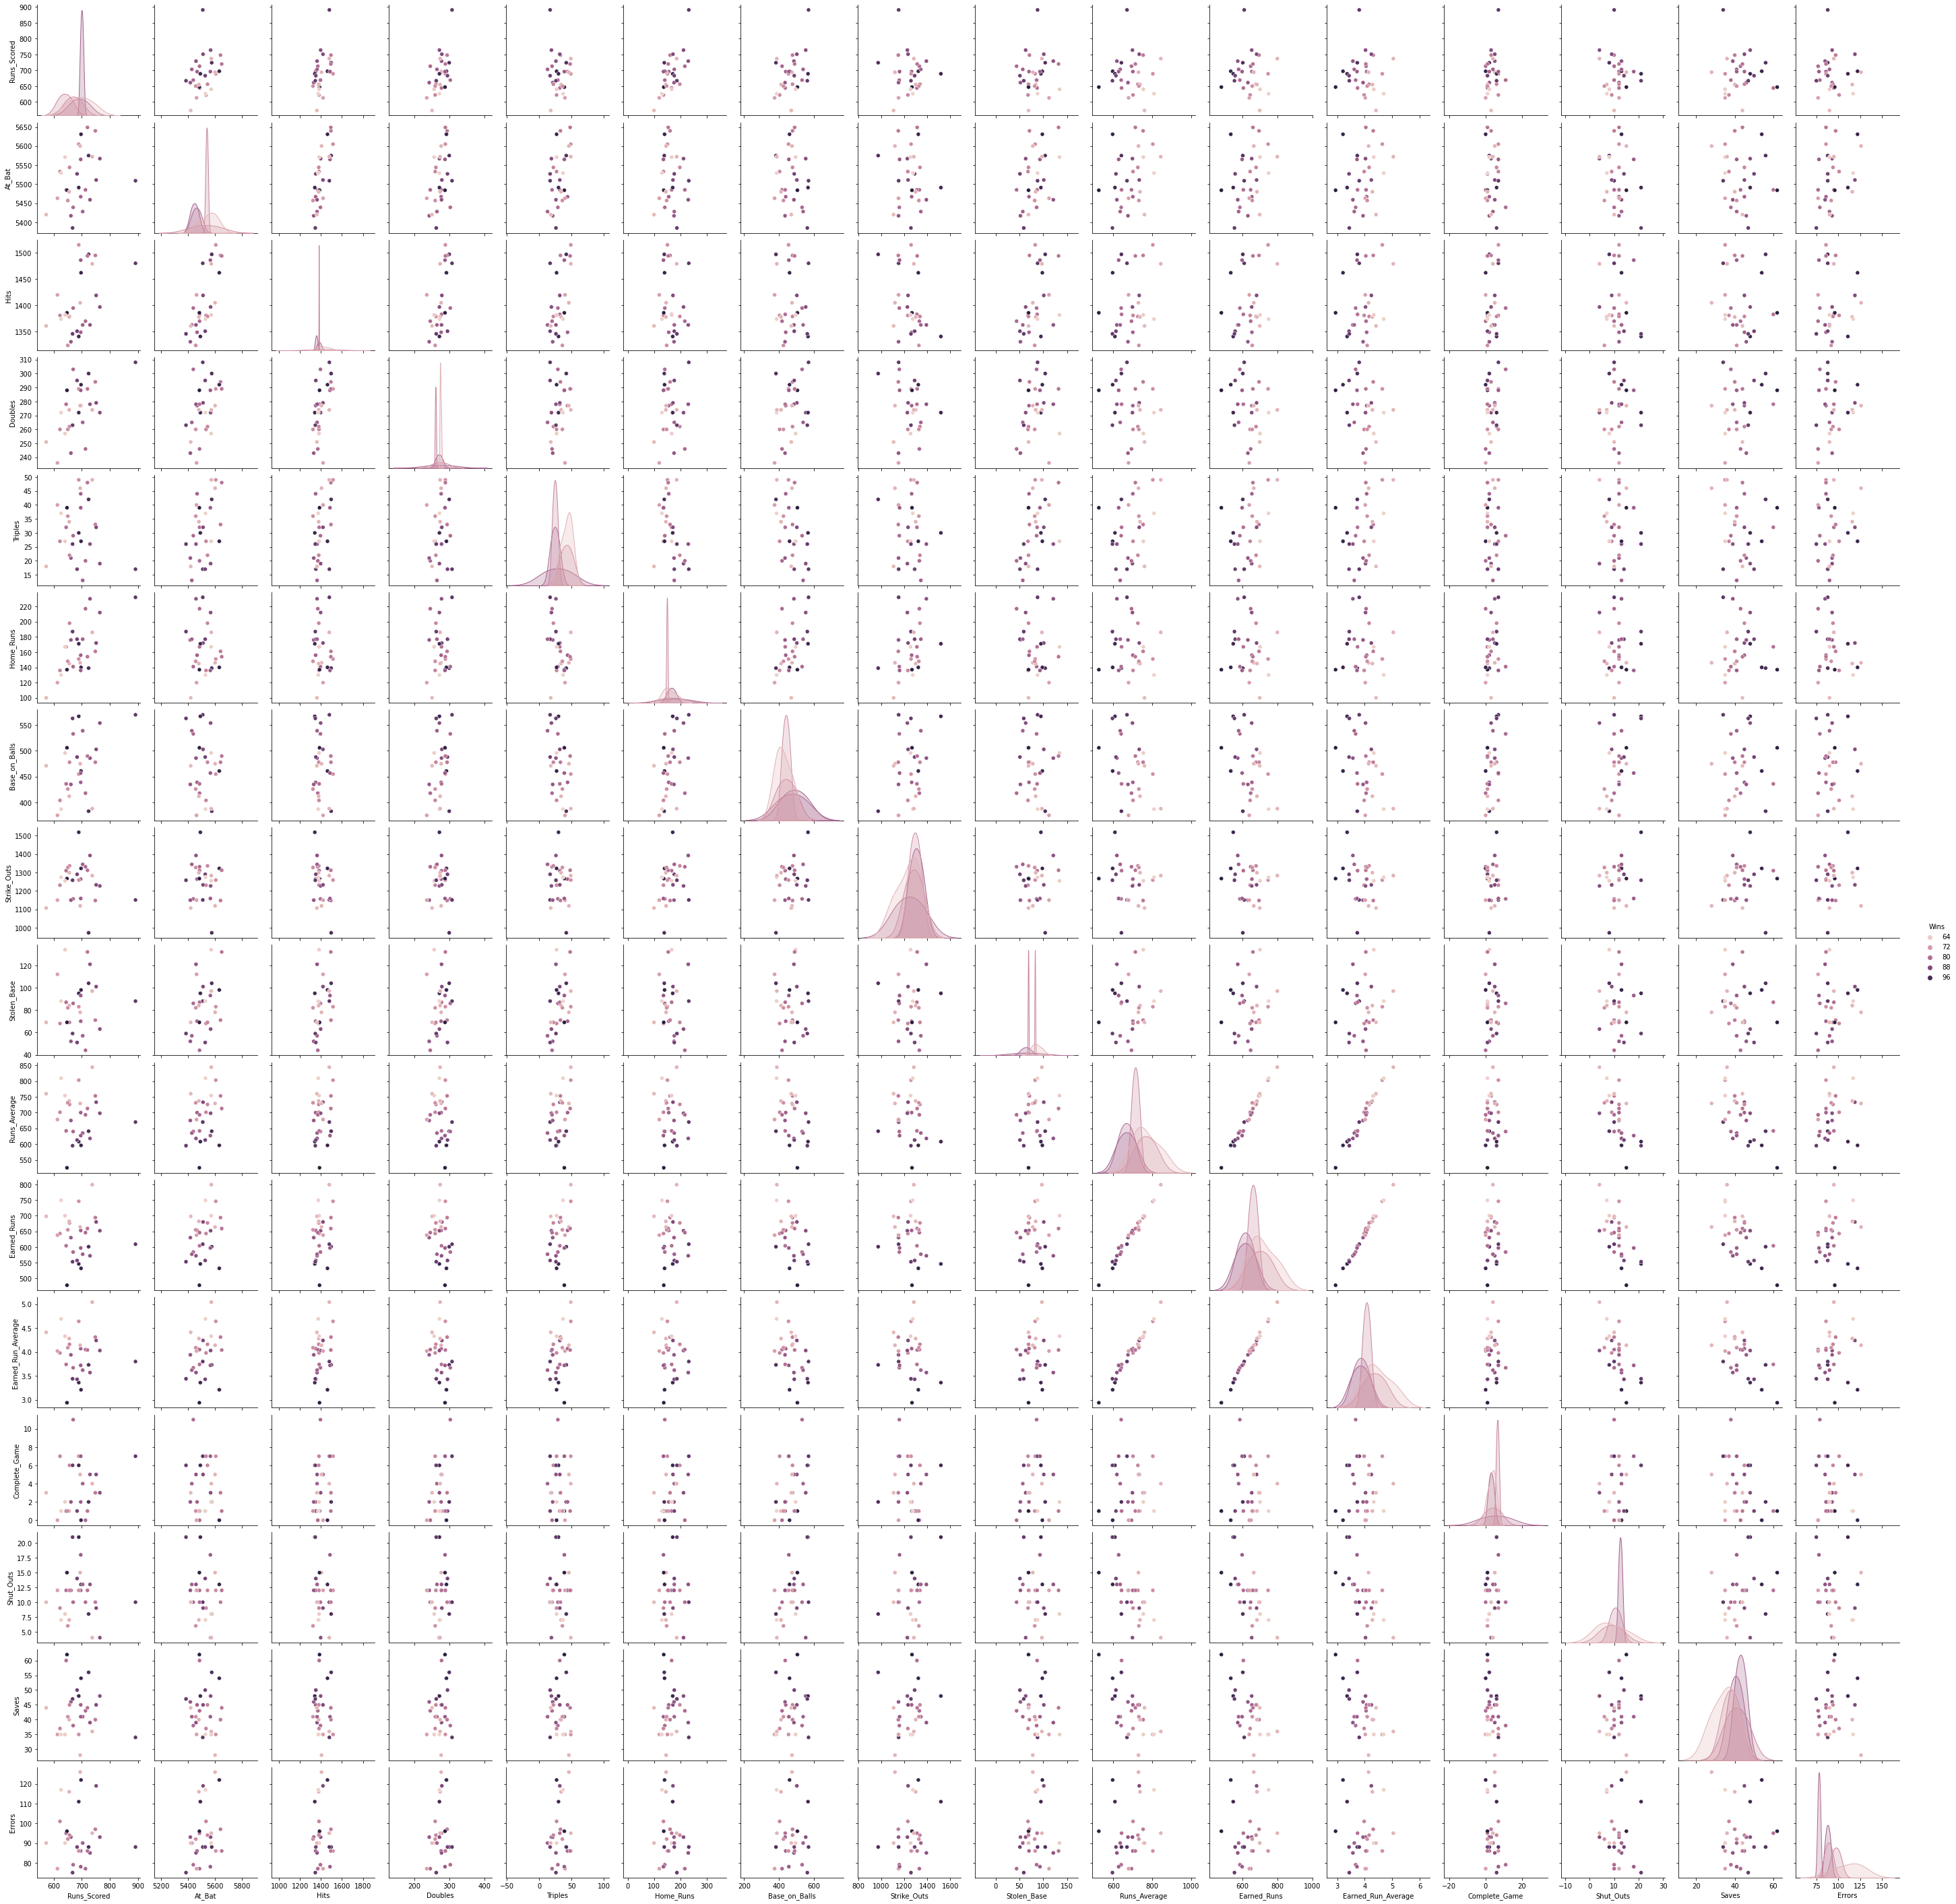

In [32]:
#here we are creating a pairplot to find relation
sns.pairplot(df, hue="Wins")

In [33]:
#find the outliers and remove
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [34]:
print("Shape of dataset after removing outliers :",df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [35]:
print('Percentage Data Loss :',((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


## Skewness of the feature

In [36]:
df1.skew()

Wins                  0.119013
Runs_Scored          -0.215364
At_Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base_on_Balls         0.151193
Strike_Outs          -0.233815
Stolen_Base           0.494966
Runs_Average          0.018155
Earned_Runs           0.018461
Earned_Run_Average    0.016693
Complete_Game         0.854980
Shut_Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

In [37]:
from scipy.stats import boxcox

In [38]:
df1['Hits']=boxcox(df1['Hits'],-2)

In [39]:
df1['Shut_Outs']=boxcox(df1['Shut_Outs'],0.5)

In [40]:
df1['Saves']=boxcox(df1['Saves'],0.5)

In [41]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [42]:
EC=['Errors','Complete_Game']
ds =df1[EC].copy()

In [43]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete_Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete_Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete_Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete_Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [44]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

In [45]:
#skewness after transforming features
df1.skew()

Wins                  0.119013
Runs_Scored          -0.215364
At_Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base_on_Balls         0.151193
Strike_Outs          -0.233815
Stolen_Base           0.494966
Runs_Average          0.018155
Earned_Runs           0.018461
Earned_Run_Average    0.016693
Complete_Game        -0.045947
Shut_Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

In [46]:
#correlation
df1.corr()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs_Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At_Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home_Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base_on_Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike_Outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen_Base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


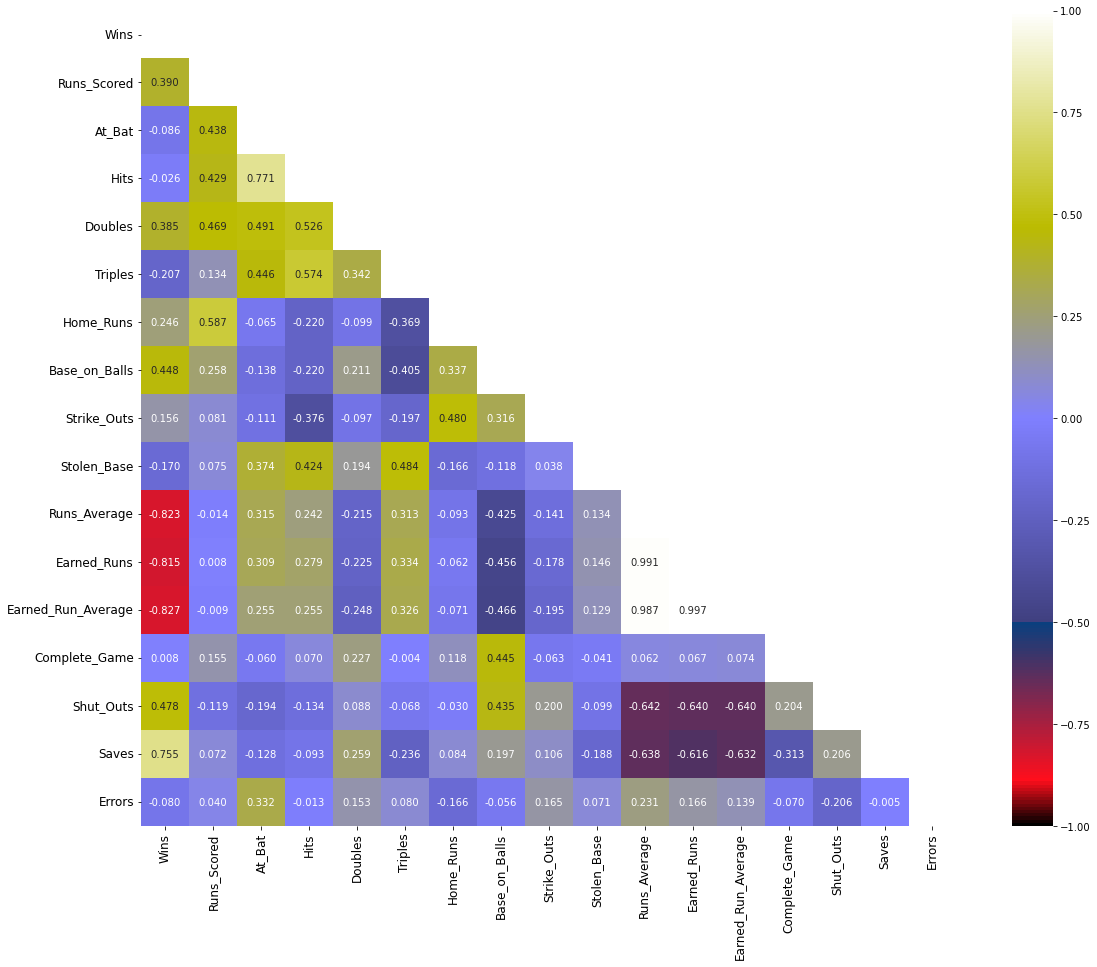

In [47]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

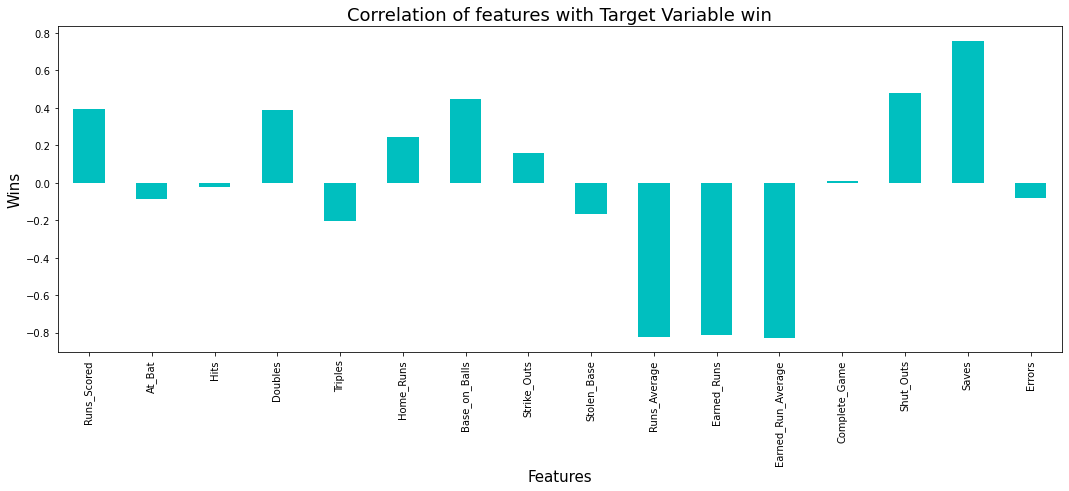

In [48]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

In [49]:
#checking variables variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,1164.543214,Wins
1,3253.807721,Runs_Scored
2,5181.779465,At_Bat
3,4817.334228,Hits
4,1157.105781,Doubles
5,32.435486,Triples
6,309.301103,Home_Runs
7,302.099558,Base_on_Balls
8,400.292880,Strike_Outs
9,28.665516,Stolen_Base


In [50]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

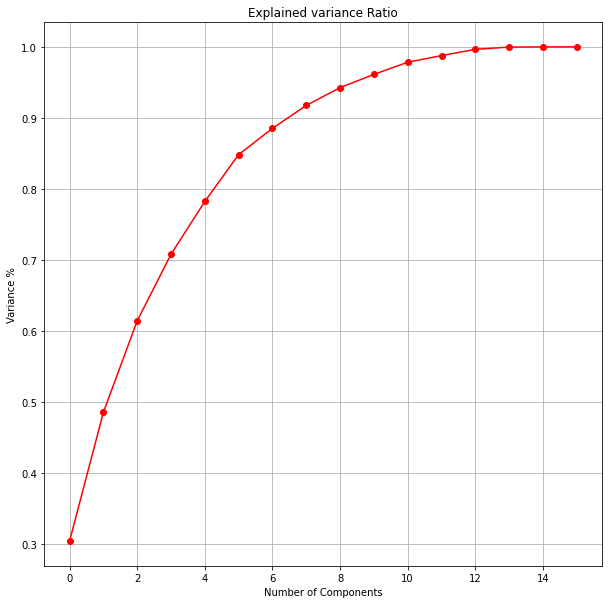

In [52]:
#PCA

from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [53]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [54]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


## Machine Learning for Multiple model building

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851038 on Random_state 217


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:\n',y_pred)
print('\n')
print('Actual Wins:',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins: 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


In [60]:
print(' Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print(' R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.562335626764825
Mean squared error : 8.560199512884239
Root Mean Squared Error: 2.9257818635168684


 R2 Score :
0.9179738330851038


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


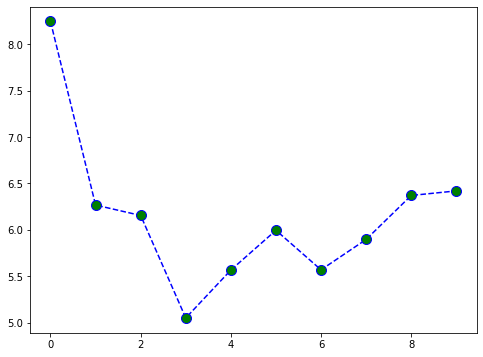

In [62]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [63]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.725310119047622
Mean squared error : 38.3468873055584
Root Mean Squared Error: 6.192486358931959


 R2 Score :
0.6325496649864145


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.25203078563025505


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 2.516268968257968
Mean squared error : 8.448615218482992
Root Mean Squared Error: 2.906650171328327


 R2 Score :
0.9190430642337308


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.6710873546839928


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 2.5712350551894207
Mean squared error : 8.55430540440071
Root Mean Squared Error: 2.9247744194041205


 R2 Score :
0.9180303120404782


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.6706084407569659


 Error of  S

In [64]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [65]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [66]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [67]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [68]:
GCV.best_params_

{'alpha': 0.5,
 'fit_intercept': True,
 'max_iter': 250,
 'normalize': True,
 'random_state': 32,
 'selection': 'random'}

### Final Model

In [69]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.6888055239454136
Mean squared error : 9.617386970550854
Root Mean Squared Error: 3.101191217992024


 R2 Score of Final Model :
0.9078435744699425




 True Values Vs Predicted Value plot :


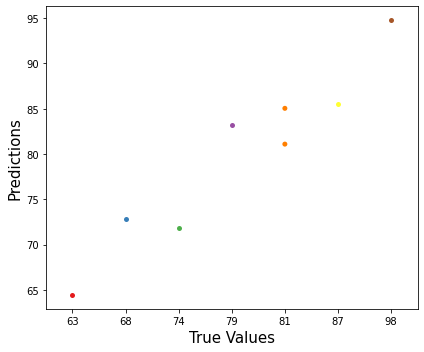

In [70]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()